In [1]:
%matplotlib inline
from pycocotools.amodal import Amodal
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import sys
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
import time
import pdb
dd = pdb.set_trace

In [69]:
def getRandomImgId(amodal):
    table = amodal.dataset['images']
    length = len(table)
    ind = np.random.randint(0, length)
    return table[ind]['id']

show_coco = True

if show_coco:
    # COCO dir
    print("show COCO examples")
    dataDir='..'
    
    dataType='val2014'
    gtFile = '../annotations/COCO_amodal_val2014.json' # the amodal annotation
    
    #dataType='train2014'
    #gtFile = '../annotations/COCO_amodal_train2014.json' # the amodal annotation
    
    #dataType='test2014'
    #gtFile = '../annotations/COCO_amodal_test2014.json' # the amodal annotation
    
    dirPattern = '%s/images/%s/%s'
    categ_names = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck",\
               "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",\
               "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",\
               "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",\
               "sports ball", "kite", "baseball bat", "baseball glove"    , "skateboard", "surfboard",\
               "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",\
               "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",\
               "chair", "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse",\
               "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",\
               "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
else:

    print("show BSDS examples")
    # pls replace with your bsds image dir
    #dataDir = '/media/yzhu/hdd/data/coco/coco/BSR/BSDS500/data'
    dataDir = '/media/denny1108/EA165C93165C631D/yzhu/data/BSR/BSDS500/data/'
    
    #dataType = 'train'
    #gtFile = '../annotations/BSDS_amodal_train.json'

    #dataType = 'val'
    #gtFile = '../annotations/BSDS_amodal_val.json'

    dataType = 'test'
    gtFile = '../annotations/BSDS_amodal_test.json'
    
    dirPattern = '%s/images/%s/BSDS_%s'


amodal=Amodal(gtFile)

imgId = 331807 # cached image demo
#imgId = getRandomImgId(amodal)

annIds = amodal.getAmodalAnnIds(imgIds=imgId)
anns = amodal.loadAnns(annIds)
print(len(amodal.dataset['images']))
ann = anns[0] # choose the first annotations. Could have multiple from different annotators.
# Documenation for the format of amodal ann:

# each ann is a dictionary with following keys: 
#'author': string type, the annotator username
#'url': string type, the raw image url, 
#     like u'https://s3-us-west-1.amazonaws.com/coco-ann/coco-val/COCO_val2014_000000238866.jpg' 
#'regions': list type, each element is a segmentation:
#         each segmentation is dict type: 
#          'segmentation': a list of points, in x,y,x,y,x,y order
#          ‘invisible_mask’ (optional): a maskAPI output type(dict with counts and size),
#                                       identify the invisible part within 'segmentation'.
#                                       if the whole segmentation is visible, this field won't exist.
#          ‘name’: string type, the name annoation, which is open dictionary.
#          'isStuff': 0 or 1, the bool annoation for isStuff or not, 1 means it belongs to stuff.
#          'occlude_rate': float, the size of invisible_mask over the size of segmentation.
#          'order': the depth order index of the region. 1 is the most front index. By default, the
#                   region list are sorted by 'order' key. But it's safe to sort by this key again to 
#                   make sure(neccessary?)
#'image_id': the image id corresponding to coco image id (how about bsds case?)
#'depth_constraint': string type, the format is like "1-2,1-33,1-34,1-37,2-3,2-5,2-6,2-33,2-34“
#                    where the number is the regions[order], so 1-2 means region[1] has spatial 
#                    overlap with regions[2], and region[1] is in front of region[2]. 'depth_constraint'
#                    contains all such pairwise depth order constraints.
#’id‘:   int type,  
#‘size’: int type, num of regions.

# This format has a significant difference compared with original coco instance annoation format:
# amodal format is stored by image. "Regions" is a key for a particular image.
# while in original coco format here: http://mscoco.org/dataset/#download
# all the instance annoatation is a big array, and we need to have a database filter to find 
# instances for a particular image via the key segmentation[image_id].

img = amodal.loadImgs(imgId)[0]
print(annIds)
print(imgId)
print(img['file_name'])

#print(ann['author'])

show COCO examples
loading annotations into memory...
Done (t=0.65s)
creating index...
index created!
1250
[644]
331807
COCO_val2014_000000331807.jpg


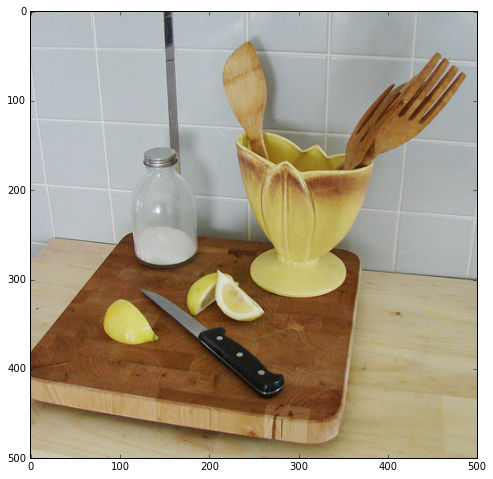

In [70]:
I = io.imread(dirPattern%(dataDir,dataType,img['file_name']))
plt.figure()
plt.imshow(I) # show raw image

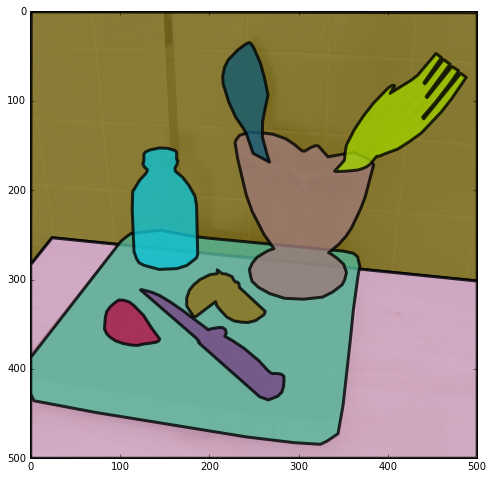

In [71]:
plt.figure()
plt.imshow(I)
amodal.showAmodalAnns(ann) # show a full annoation: draw all annoatated objects with depth ordering effect

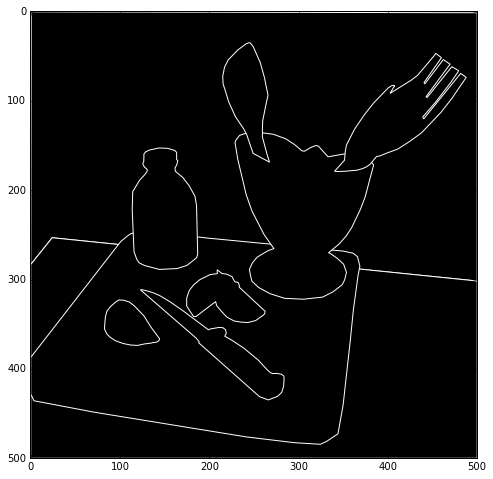

In [72]:
plt.figure()
plt.imshow(np.zeros(I.shape))
amodal.showEdgeMap(ann) # show the edge map of this annotation

In [73]:
print("depth order constraints:")   # show depth order annotation
constraints = ann['depth_constraint']
print(constraints)

depth order constraints:
1-8,1-9,2-8,2-9,3-8,3-9,4-8,4-9,4-10,5-7,5-10,6-7,6-10,7-8,7-9,7-10,8-9,8-10


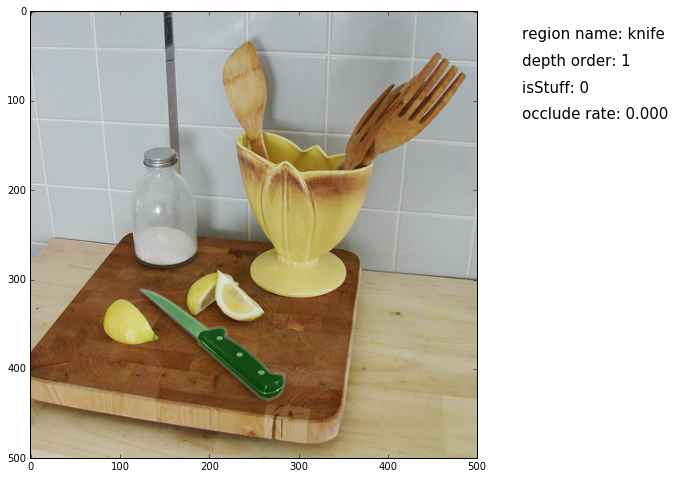

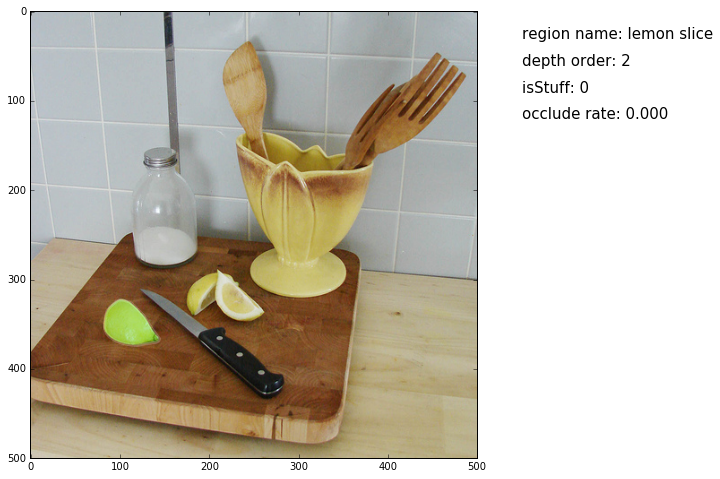

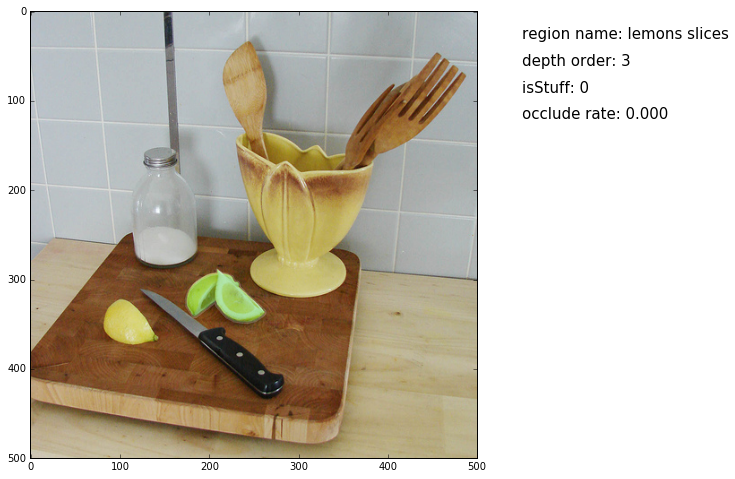

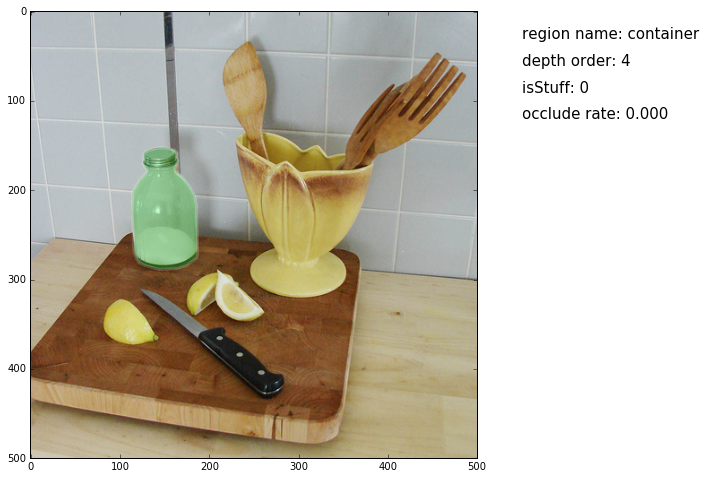

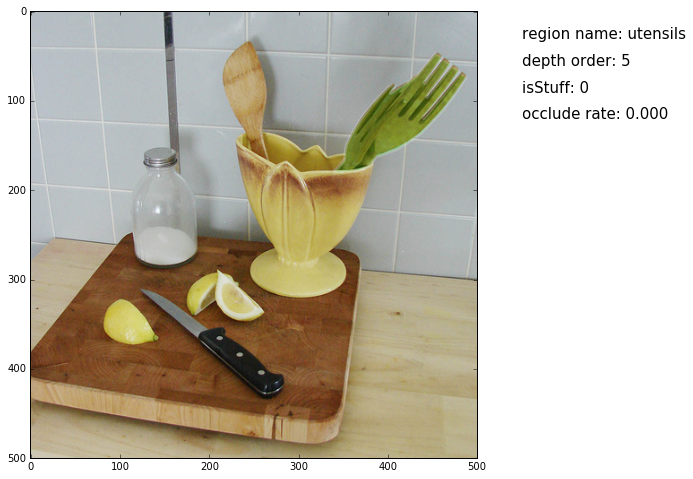

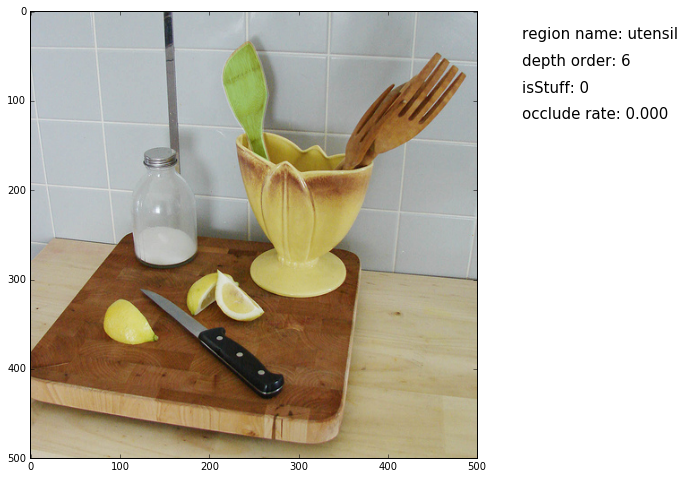

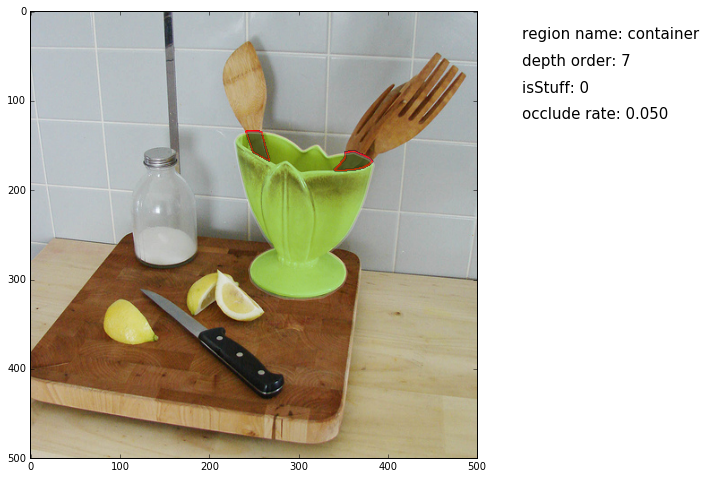

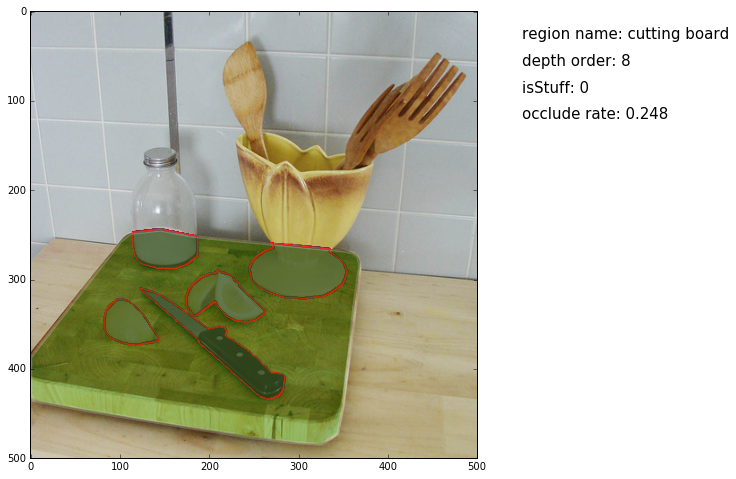

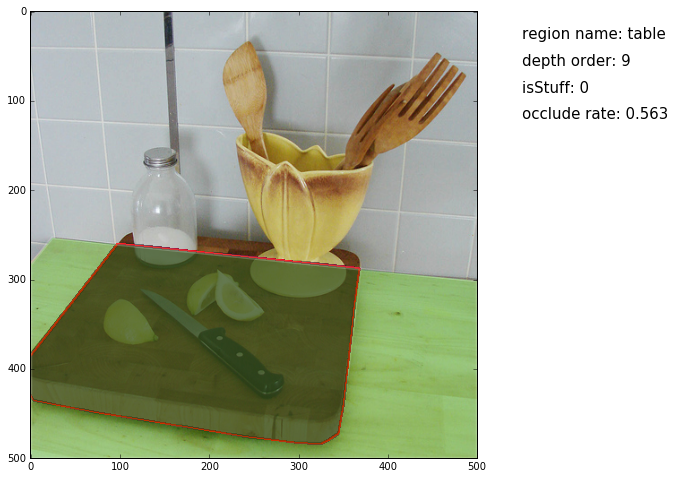

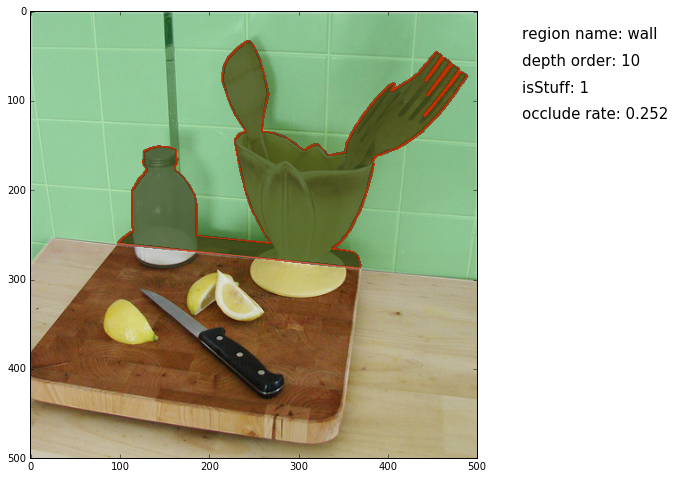

In [74]:
# show each annotated object in this image
for ins in range(ann['size']):
    plt.figure()
    plt.imshow(I)
    #amodal.showModalInstance(ann, ins+1) # show k-th region, only visible mask 
    amodal.showAmodalInstance(ann, ins+1) # show k-th region, with invisible_mask highlighted 
    ax = plt.gca()
    nameStr = "region name: " + ann['regions'][ins]['name']
    depthStr = "depth order: " + str(ann['regions'][ins]['order'])
    stuffStr = "isStuff: " + str(ann['regions'][ins]['isStuff'])
    rateStr = "occlude rate: " + '%0.3f' % ann['regions'][ins]['occlude_rate']
    if 'category_id' in ann['regions'][ins]:
        fakecatStr = "fake cat: " + ann['regions'][ins]['category_id']
    
    # show properties of each region
    ax.annotate(nameStr, xy=(1, 1), xytext=(img['width']+ 50, 30), fontsize=15)
    ax.annotate(depthStr, xy=(1, 1), xytext=(img['width']+ 50, 60), fontsize=15)
    ax.annotate(stuffStr, xy=(1, 1), xytext=(img['width']+ 50, 90), fontsize=15)
    ax.annotate(rateStr, xy=(1, 1), xytext=(img['width']+ 50, 120), fontsize=15)
    if 'category_id' in ann['regions'][ins]:
        ax.annotate(fakecatStr, xy=(1, 1), xytext=(img['width']+ 50, 150), fontsize=15)
        if fakecatStr[10] == '_':
            catNum = int(fakecatStr[11:])
        else:
            #print(fakecatStr[10:])
            catNum = int(fakecatStr[10:])
        #print(catNum)
        ax.annotate("multipath net prediction: " + categ_names[catNum-2], xy=(1, 1), xytext=(img['width']+ 50, 180), fontsize=15)

###### 

249021
